# Data Science Salaries Trends 2020 - 2022

In [230]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [231]:
os.getcwd()

'C:\\Users\\prajw\\Downloads\\ds'

In [232]:
os.chdir('..\\')

In [233]:
os.getcwd()

'C:\\Users\\prajw\\Downloads'

In [236]:
os.chdir('.\ds')

In [237]:
df = pd.read_csv('ds_salaries.csv')

In [238]:
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [239]:
df.shape

(607, 12)

In [240]:
df.describe(include = 'all')

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


### Understand the dataset

- work_year: The data set contains information for 3 years. [2020, 2021, 2022]

- employment_type: The type of employement for the role. PT = Part-time,FT= Full-time,CT = Contract

- job_title: The role worked in during the year. Data Scientist Data Engineer Machine Learning Scientist Big Data Engineer Data Analyst

- salary: The total gross salary amount paid in USD.

- employee_residence: Employee's primary country of residence in during the work year. US GB FR TR DE ..

- remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

- company_location: The country of the employer's main office or contracting branch. DE JP HN US ..

- Company_size: The average number of people that worked for the company during the year. S (Small) < 50 50 < M (Medium) < 250 250 < L (Large)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [242]:
df.shape

(607, 12)

In [243]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [244]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

##### Dropping values which dont add additional value to the information already available

In [245]:
df[['Unnamed: 0', 'salary', 'salary_currency']]

,Unnamed: 0,salary,salary_currency
0,0,70000,EUR
1,1,260000,USD
2,2,85000,GBP
3,3,20000,USD
4,4,150000,USD
...,...,...,...
602,602,154000,USD
603,603,126000,USD
604,604,129000,USD
605,605,150000,USD


In [246]:
df.drop(columns = ['Unnamed: 0', 'salary', 'salary_currency'], inplace = True)

In [247]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


##### Changing the encoding of a few of the categorical columns to better understand the information they are trying to convey

In [248]:
print(df['experience_level'].unique())
print(df['employment_type'].unique())
print(df['company_size'].unique())
print(df['remote_ratio'].unique())

['MI' 'SE' 'EN' 'EX']
['FT' 'CT' 'PT' 'FL']
['L' 'S' 'M']
[  0  50 100]


In [249]:
df['experience_level'] = df['experience_level'].map({'EN': 'Entry-Level', 'MI': 'Mid-Level', 'SE': 'Senior-Level', 'EX': 'Executive-Level'})
df['employment_type'] = df['employment_type'].map({'FT':'Full-time', 'CT':'Contract', 'PT':'Part-time', 'FL':'Full-time'})
df['company_size'] = df['company_size'].map({'L':'Large', 'S':'Small', 'M':'Medium'})
df['remote_ratio'] = df['remote_ratio'].map({0:'On-site', 50:'Hybrid', 100:'Remote'})

In [250]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full-time,Data Scientist,79833,DE,On-site,DE,Large
1,2020,Senior-Level,Full-time,Machine Learning Scientist,260000,JP,On-site,JP,Small
2,2020,Senior-Level,Full-time,Big Data Engineer,109024,GB,Hybrid,GB,Medium
3,2020,Mid-Level,Full-time,Product Data Analyst,20000,HN,On-site,HN,Small
4,2020,Senior-Level,Full-time,Machine Learning Engineer,150000,US,Hybrid,US,Large


In [251]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

##### Let us first try to understand the salary ranges at different experience levels

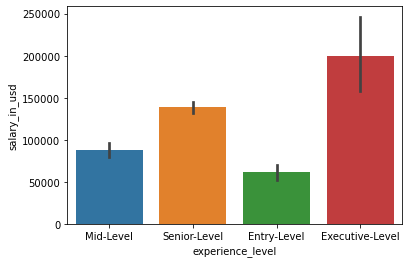

In [252]:
sns.barplot(x = 'experience_level', y = 'salary_in_usd', data = df);

We can clearly see the smooth progression of salaries as the experience level increases. The Entry-level employes are typically earning around 50-60k USD. while the Mid-level employes are earning on average 40k USD more. Then the Senior-level employes have their salary ranging from 140-150k USD,  and finally the Executive-level employes are the highest earners with a salary range of 200-250k. One thing to note is that the executive level employees have a higher degree of variability compared to the non-exec employees. This might be because typically the top executives have an experience of over 25 years, and most of them would have seldom worked/managed non-data science projects/teams; so the skew/variability in the salary range.

Considering the varied job titles available in the data, let us look at the top 7 most commonly occuring titles in the ds space, and visualise the split up. At the same time to not lose representation of the rest of the titles, I am combining the job titles (after 7 most common) as 'Others'.

In [255]:
job_title = pd.DataFrame(df['job_title'].value_counts().reset_index())

In [257]:
job_title.columns = ['designation', 'count']

In [296]:
job_title.head()

,designation,count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16


In [297]:
job_title.loc[6.5] = ['Others', job_title['count'][7:].sum()]
job_title.head(10)

,designation,count
0.0,Data Scientist,143
1.0,Data Engineer,132
2.0,Data Analyst,97
3.0,Machine Learning Engineer,41
4.0,Research Scientist,16
5.0,Data Science Manager,12
6.0,Data Architect,11
7.0,Others,155
8.0,Big Data Engineer,8
9.0,Machine Learning Scientist,8


In [269]:
job_title = job_title.sort_index().reset_index(drop = True)

In [270]:
job_title.head(10)

,designation,count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16
5,Data Science Manager,12
6,Data Architect,11
7,Others,155
8,Big Data Engineer,8
9,Machine Learning Scientist,8


In [277]:
job_title['count'][:8]

0    143
1    132
2     97
3     41
4     16
5     12
6     11
7    155
Name: count, dtype: int64

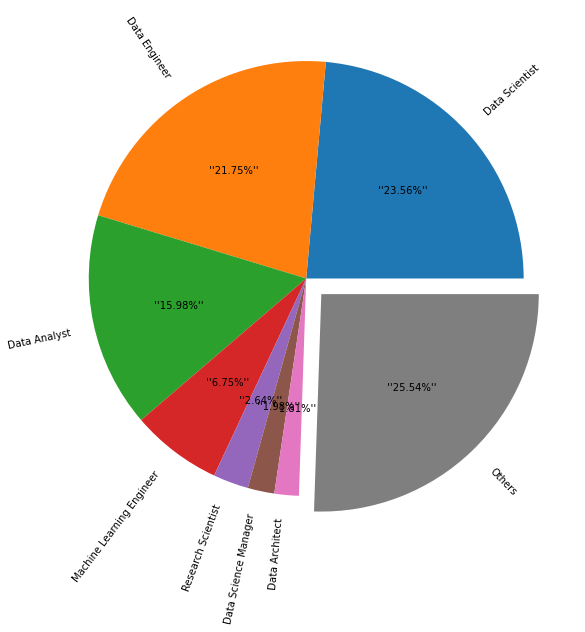

In [287]:
plt.figure(figsize = (10, 10))
exp = (0, 0, 0, 0, 0, 0, 0, 0.1)
plt.pie(job_title['count'][:8], labels = job_title['designation'][:8], autopct="''%1.2f%%''", rotatelabels = 270, explode = exp);

Over 60% of the jobs belong to one of the three categories - Data Scientist, Data Engineer and Data Analyst (Data Scientist being the most popular among the three).

##### Now let us drop the duplicated rows and see if the the trend/spread of salaries among employees at different experience levels remain the same across years

In [288]:
df.duplicated().value_counts()

False    565
True      42
dtype: int64

In [289]:
df.drop_duplicates(inplace = True)

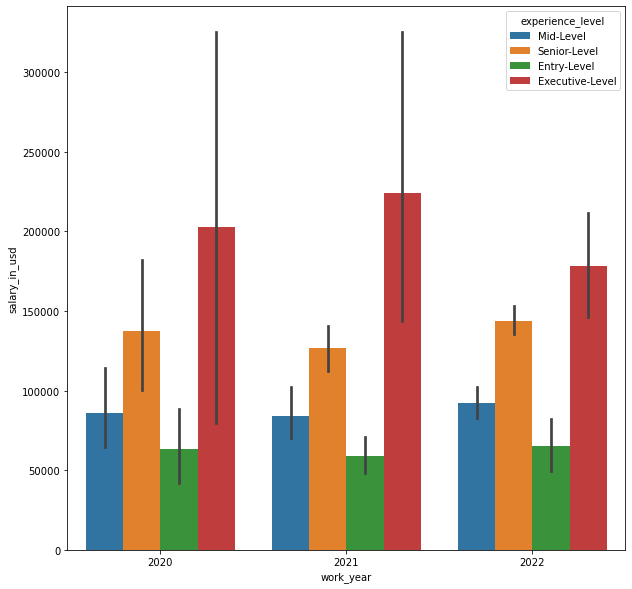

In [291]:
plt.figure(figsize = (10, 10))
sns.barplot(x='work_year',y='salary_in_usd',hue='experience_level',data=df);

An interesting thing to note from the above graph is that the non-exec employees had their salaries cut down in the year 2021, due to residual effects of COVID, while during the same year the executives of the companies have had their salaries hiked. This is in line with the fact most companies had coservative bonus goals set post 2020, and the higher bonuses and LTI rewards. When we move to the year 2022, we can see that the non-executive salaries have increased in comparison to the year 2021, attributable to strong performance in first half of 2022, high attrition rates, inflationary pressues and higher salaries being offered by companies; while the CEOs salary has decreased - attributable to fed rate hike, companies missing targets in comparison to strong H1 of the year, and subsequently the CEOs missing their bonuses

##### A look at the company size split of our data

<AxesSubplot:xlabel='company_size', ylabel='count'>

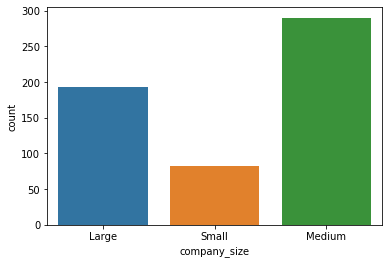

In [292]:

sns.countplot(data=df,x='company_size')

##### Highlighting the region from where most of the data science employees work from

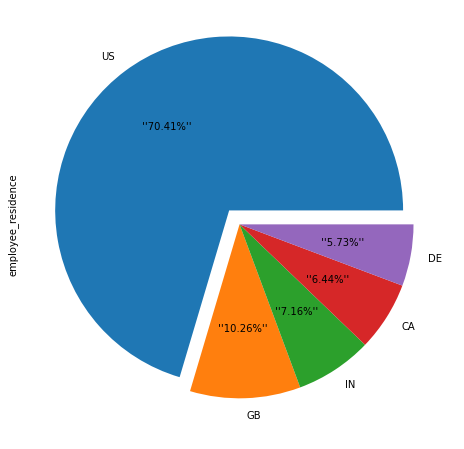

In [295]:
emp_res = df['employee_residence'].value_counts().head(5)
plt.figure(figsize=(8,8))
emp_res.plot(kind='pie',autopct="''%1.2f%%''",explode=(0.1, 0, 0, 0, 0));